In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv('./AirPassengers.csv').rename(columns={'Month': 'Date'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,#Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Time Series Plot

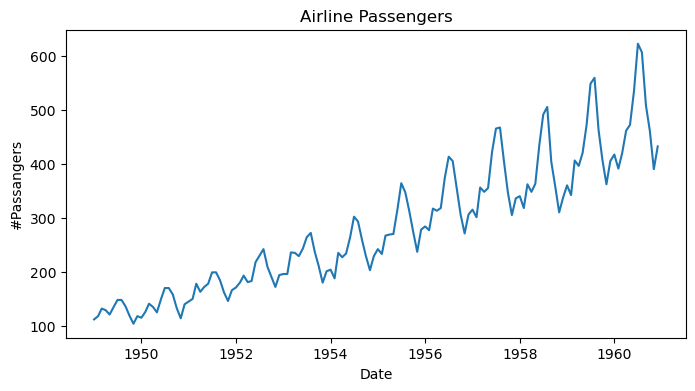

In [4]:
plt.figure(figsize=(8,4))
plt.plot(df)
plt.title('Airline Passengers')
plt.xlabel('Date')
plt.ylabel('#Passangers')
plt.show()

For a time series to be considered stationary:
- Constant mean
- Constant variance
- No seasonality

## Time Series Decomposition

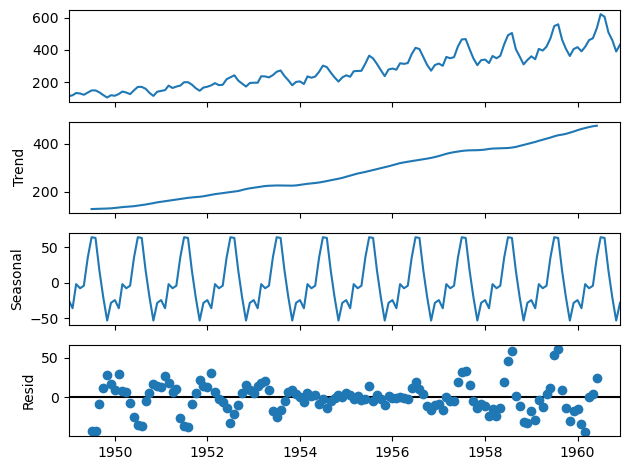

In [5]:
result = seasonal_decompose(df, model='additive')
result.plot()
plt.show()

## Stationarity test

In [6]:
def adf_test(timeseries):
    print('Results of Augmented Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

- If the p-value is less than 0.05, we can reject the null hypothesis (H0), which indicates that the series is stationary.
- If the p-value is greater than 0.05, we fail to reject H0, indicating that the series is not stationary.

In [7]:
adf_test(df['#Passengers'])

Results of Augmented Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


- If the series is stationary, there is a strong indication that we can use the past to predict the future.
- If the series is not stationary, we can try to transform it (for example, using differencing) to make it stationary and then use the past to predict the future.